# Resultados

## Solución

Este proyecto tiene como objetivo investigar la efectividad y aplicación de los clasificadores en la creación de estrategias de trading. Aprovechando los avances en el aprendizaje de la automatización, este proyecto se sumerge en un análisis detallado. El enfoque principal se centra en maximizar la rentabilidad y el rendimiento mediante la implementación y ajuste de varias estrategias.

El proyecto examina la eficacia de las metodologías al desglosar y comparar múltiples estrategias. En este caso se usaron las siguientes: 

1. RSI (Relative Strength Index): El Índice de Fuerza Relativa es un indicador de momentum que mide la velocidad y el cambio de los movimientos de los precios. Un valor por encima de 70 generalmente indica sobrecompra, mientras que un valor por debajo de 30 indica sobreventa.


2. BB (Bollinger Bands): Las Bandas de Bollinger son un indicador de volatilidad que consiste en una banda superiory una banda inferior. Las bandas superior e inferior se calculan agregando y restando un múltiplo del desviación estándar de los precios de cierre de la banda media. Estas bandas se expanden y contraen según la volatilidad del mercado. Las bandas se calculan de la siguiente manera: 

    - Banda Superior: Sumas dos veces la desviación estándar a la media móvil.
    - Banda Inferior: Restas dos veces la desviación estándar de la media móvil.
    

3. MM (Moving Average): El Promedio Móvil es un indicador que calcula el promedio de un conjunto de puntos de datos a lo largo de un período de tiempo específico. Las Medias Móviles se utilizan para suavizar las fluctuaciones en los datos y para identificar la dirección general de la tendencia de los precios. Las Medias Móviles también se calculan utilizando los precios de cierre durante un período de tiempo específico. Hay diferentes tipos de medias móviles, pero la más común es la media móvil simple (SMA). Esta se calcula de la siguiente manera:

    - Suma los precios de cierre durante un período de tiempo específico.
    - Divide la suma por el número de períodos.

Mediante un análisis comparativo en profundidad, este proyecto se esfuerza por descubrir información detallada sobre las estrategias de trading. Examina las habilidades de los modelos para adaptarse a las dinámicas cambiantes del mercado, mitigar riesgos y maximizar retornos.

La documentación del proyecto abarca una investigación de múltiples estrategias, mostrando una visión integral de sus fortalezas, debilidades y aplicaciones potenciales en escenarios de trading del mundo real. Además, tiene como objetivo proporcionar un informe claro y completo que detalla el recorrido, descubrimientos e ideas obtenidos a lo largo de esta exploración rigurosa.

## Gráfica

![Resultados](Grafica.jpeg)

![Resultados sin Media Movil](Grafica_SIN_MM.jpeg)

El gráfico y la tabla numérica muestran el valor de un portafolio gestionado con diferentes estrategias de trading basadas en indicadores técnicos sobre un periodo de tiempo. La estrategia de Medias Móviles sobresale con un crecimiento exponencial, mientras que las demás estrategias apenas superan el capital inicial.

Esto sugiere que, en el periodo de tiempo y el conjunto de datos analizados, una estrategia de cruce de medias móviles ha sido mucho más efectiva que las otras estrategias, ya sea individualmente o en combinación.

La tabla numérica refuerza este punto mostrando que la columna correspondiente a 'MM' presenta los valores más altos hacia el final del conjunto de datos; esto podría indicar que la estrategia de MM ha capturado con éxito tendencias más largas o ha evitado pérdidas significativas durante periodos de volatilidad del mercado.

La superioridad de la estrategia basada en MM en este escenario particular podría deberse a su capacidad para seguir tendencias a largo plazo, lo cual suele ser una estrategia preferida en mercados con direccionalidad clara, sin embargo, es crucial realizar pruebas adicionales en diferentes periodos de tiempo y condiciones de mercado antes de concluir la efectividad general de esta estrategia. 

Además, es importante considerar los riesgos inherentes, como la posibilidad de que esta estrategia no funcione tan bien en mercados laterales o altamente volátiles.

In [1]:
from technical_analysis.main import perform, create_optimization_function

import pandas as pd
import optuna
import matplotlib.pyplot as plt

c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Preprocesamiento de tus datos
data = pd.read_csv('data/aapl_5m_train.csv')
data = data.head(4000) 
data_validation = pd.read_csv('data/aapl_5m_test.csv')
data_validation = data_validation.head(1500)

In [3]:
# Mejores hiperparametros

# Crear una instancia de la función de optimización con los datos cargados
optimization_function_with_data = create_optimization_function(data)

# Ahora, pasamos la función directamente sin llamarla
study = optuna.create_study()
study.optimize(optimization_function_with_data, n_trials=10)

print("Mejores parámetros:", study.best_params)

[I 2024-03-22 14:21:13,859] A new study created in memory with name: no-name-e93e3b7a-1d5e-4161-ac24-df56a15e4675
[I 2024-03-22 14:22:14,342] Trial 0 finished with value: -1033233.7651326102 and parameters: {'rsi_buy': 31, 'rsi_sell': 86, 'bb_window': 15, 'mm_short_window': 41, 'mm_long_window': 181, 'stop_loss': 0.03023236617572768, 'take_profit': 0.08029811686644323}. Best is trial 0 with value: -1033233.7651326102.
[I 2024-03-22 14:23:03,823] Trial 1 finished with value: -1036267.739285315 and parameters: {'rsi_buy': 28, 'rsi_sell': 76, 'bb_window': 22, 'mm_short_window': 41, 'mm_long_window': 190, 'stop_loss': 0.04471060502406299, 'take_profit': 0.03682870571670915}. Best is trial 1 with value: -1036267.739285315.
[I 2024-03-22 14:24:25,352] Trial 2 finished with value: -1035432.0283072569 and parameters: {'rsi_buy': 37, 'rsi_sell': 77, 'bb_window': 23, 'mm_short_window': 48, 'mm_long_window': 191, 'stop_loss': 0.09220581282494117, 'take_profit': 0.04479099173254389}. Best is trial

Mejores parámetros: {'rsi_buy': 19, 'rsi_sell': 60, 'bb_window': 15, 'mm_short_window': 43, 'mm_long_window': 127, 'stop_loss': 0.07023274375556546, 'take_profit': 0.04496503864261153}


In [4]:
best_params = study.best_params
best_value = -study.best_value

In [10]:
# Resultados de validation con los mejores parametros

rsi_thresholds = (best_params['rsi_buy'], best_params['rsi_sell'])
bb_window = best_params['bb_window']
mm_windows = (best_params['mm_short_window'], best_params['mm_long_window'])  # Corrige las claves aquí
commission = 0.0025
stop_loss = best_params['stop_loss']
take_profit = best_params['take_profit']

df_results, strategy_dfs, combined_values_df = perform(
    data_validation, rsi_thresholds, bb_window, mm_windows, commission, stop_loss, take_profit)

best_strategy = df_results.iloc[df_results['gain'].idxmax()]['strategy']  # Suponiendo que 'gain' es tu métrica de rendimiento.
best_strategy_df = strategy_dfs[best_strategy]

df_results.sort_values(by='gain', ascending=False) 

,gain,strategy,orders_executed
0,1.038065e+06,['rsi'],454.0
4,1.007783e+06,"['rsi', 'MM']",83.0
3,1.006786e+06,"['rsi', 'bb']",77.0
1,1.003017e+06,['bb'],137.0
6,1.001383e+06,"['rsi', 'bb', 'MM']",18.0
5,9.989305e+05,"['bb', 'MM']",58.0
2,9.553331e+05,['MM'],1457.0


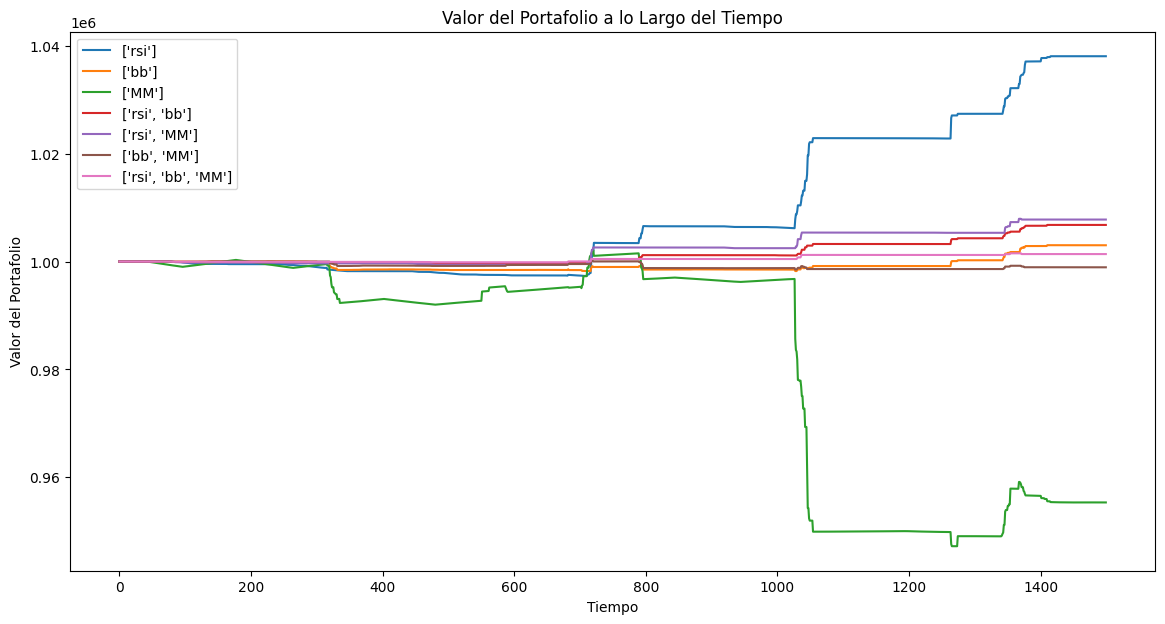

In [7]:
# Valor del Portafolio a lo Largo del Tiempo

plt.figure(figsize=(14, 7))
plt.plot(combined_values_df, label='Valor del Portafolio')
plt.title(f"Valor del Portafolio a lo Largo del Tiempo")
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(combined_values_df.columns)
plt.show()

### Grafica sin MM (debido a que hace uqe no se vea la magnitud del comportamineto de otras estrategias)

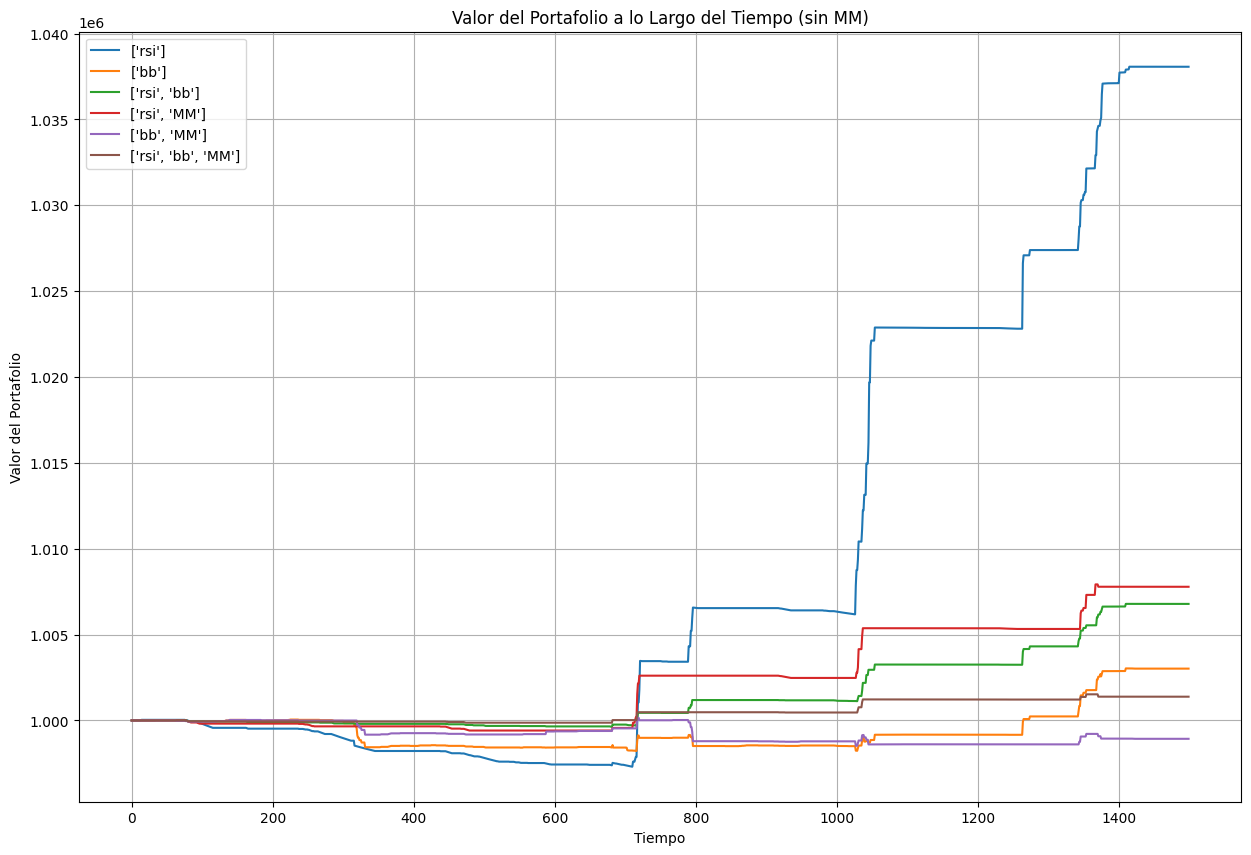

In [11]:
# Valor del Portafolio a lo Largo del Tiempo (sin MM) 

df_without_MM = combined_values_df.drop(columns="['MM']")

# Gráfica sin la columna 'MM'
plt.figure(figsize=[15,10])
plt.plot(df_without_MM, label=df_without_MM.columns)
plt.title('Valor del Portafolio a lo Largo del Tiempo (sin MM)')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend(df_without_MM.columns)
plt.grid(True)
plt.show()